## SKLEARN DATASETS and BASIC MODEL FITTING

### DATASETS

In [0]:
from sklearn import datasets
import pandas as pd
import numpy as np
datasets.load_iris?

In [0]:
dset = datasets.load_iris()
X = dset['data']
y = dset['target']
tnames= dset['target_names']
fnames= dset['feature_names']
#X,y = datasets.load_iris(return_X_y=True)

In [13]:
fnames

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
y.shape

(150,)

In [15]:
X.shape

(150, 4)

### If you use pandas you convert it to pandas dataframe

In [16]:
df = pd.DataFrame(X,columns=fnames)
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count         150.000000        150.000000         150.000000        150.000000
mean            5.843333          3.057333           3.758000          1.199333
std             0.828066          0.435866           1.765298          0.762238
min             4.300000          2.000000           1.000000          0.100000
25%             5.100000          2.800000           1.600000          0.300000
50%             5.800000          3.000000           4.350000          1.300000
75%             6.400000          3.300000           5.100000          1.800000
max             7.900000          4.400000           6.900000          2.500000

In [17]:
# to add targets into the dataframe
y1 = y[:,np.newaxis]
XY = np.concatenate((X,y1), axis=1)
colnames = fnames
colnames.append('target')
print(colnames)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']


In [18]:
columns_names =np.concatenate((fnames,tnames))
df = pd.DataFrame(data=XY,columns=colnames)
df

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                  5.1               3.5  ...               0.2     0.0
1                  4.9               3.0  ...               0.2     0.0
2                  4.7               3.2  ...               0.2     0.0
3                  4.6               3.1  ...               0.2     0.0
4                  5.0               3.6  ...               0.2     0.0
..                 ...               ...  ...               ...     ...
145                6.7               3.0  ...               2.3     2.0
146                6.3               2.5  ...               1.9     2.0
147                6.5               3.0  ...               2.0     2.0
148                6.2               3.4  ...               2.3     2.0
149                5.9               3.0  ...               1.8     2.0

[150 rows x 5 columns]

In [19]:
df.describe()

sepal length (cm)  sepal width (cm)  ...  petal width (cm)      target
count         150.000000        150.000000  ...        150.000000  150.000000
mean            5.843333          3.057333  ...          1.199333    1.000000
std             0.828066          0.435866  ...          0.762238    0.819232
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.800000          3.000000  ...          1.300000    1.000000
75%             6.400000          3.300000  ...          1.800000    2.000000
max             7.900000          4.400000  ...          2.500000    2.000000

[8 rows x 5 columns]

In [20]:
from matplotlib import pyplot as plt

plt.figure()
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13e4563d68>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13e3e75fd0>,
      dtype=object)

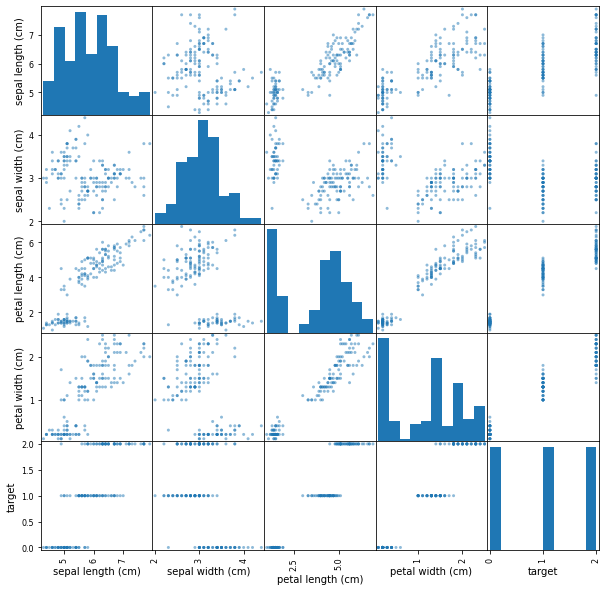

In [21]:
pd.plotting.scatter_matrix(df,figsize=(10,10))

#### It is also possible to create synthetic datasets

In [0]:
rng = np.random.RandomState(42)
s_X,s_y =datasets.make_blobs(n_samples=100, n_features=2, random_state= 0)


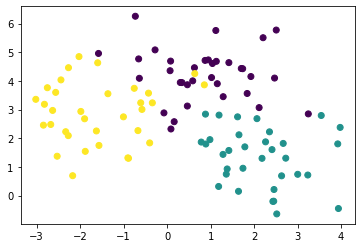

In [23]:
plt.scatter(s_X[:,0],s_X[:,1], c=s_y)

In [30]:
X1, Y1 = datasets.make_classification(n_samples=1000,n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=2, n_classes=2, random_state= 0)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

In [31]:
### or create a random dataset with numpy
rng = np.random.RandomState(42)

x = 10 * rng.rand(50)
print(x)
y = 2 *x - 1 + 0.1*rng.rand(50)
print(y)

plt.plot(x,y,'o')

[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578 0.20584494 9.69909852
 8.32442641 2.12339111 1.81824967 1.8340451  3.04242243 5.24756432
 4.31945019 2.9122914  6.11852895 1.39493861 2.92144649 3.66361843
 4.56069984 7.85175961 1.99673782 5.14234438 5.92414569 0.46450413
 6.07544852 1.70524124 0.65051593 9.48885537 9.65632033 8.08397348
 3.04613769 0.97672114 6.84233027 4.40152494 1.22038235 4.9517691
 0.34388521 9.09320402 2.58779982 6.62522284 3.11711076 5.20068021
 5.46710279 1.84854456]
[ 6.58776084 18.09179941 13.73382873 11.06265242  2.18016281  2.21207783
  0.17052149 16.3431212  11.02682296 13.19398459 -0.54944239 18.42533195
 15.73172657  3.28245755  2.6645928   2.72235981  5.09893728  9.57534833
  7.64635544  4.9232715  11.31428237  1.80974878  4.84344518  6.40878301
  8.19208542 14.77641994  3.07060268  9.29209323 10.88413795 -0.05940484
 11.23720738  2.47281229  0.33412166 17.98406658 18.34373889 15.20046529
  5.

In [41]:
aa = np.array([[0], [1], [2]])
bb = np.array([1, 1.2, 1.4])
plt.plot(aa,bb,'o')
plt.xlim([-1,4])
plt.ylim([-1,2])

(-1.0, 2.0)

#### Now lets learn to fit a linear  model
https://scikit-learn.org/stable/modules/linear_model.html

In [36]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(aa, bb)


print(reg)
print(reg.coef_)
print(reg.intercept_)

reg.predict([[3],[-1]])




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[0.2]
5.551115123125783e-17


array([ 0.6, -0.2])

In [42]:
# https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
x1 = x[:,np.newaxis]
model.fit(x1,y)
print(model.coef_)
print(model.intercept_)



[2.00066077]
-0.9535027575080042


In [45]:
tstx = np.linspace(5,15,20)
tstxmat = tstx[:, np.newaxis]
tsty = model.predict(tstxmat)

plt.plot(x,y,'ro')
plt.plot(tstx, tsty, '-*')